<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Data%20Manipulation%20with%20pandas/data_manipulation_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Manipulation with Pandas

**Pandas** (Python Data Analysis Library) is one of the most powerful and popular libraries for data manipulation and analysis in Python. Built on top of NumPy, pandas provides high-performance, easy-to-use data structures and data analysis tools that make working with structured data both intuitive and efficient.

## Why Pandas is Essential

Pandas has become the **backbone of data science** in Python for several compelling reasons:

### **Powerful Data Structures**
- **DataFrame**: 2-dimensional labeled data structure (think Excel spreadsheet with superpowers)
- **Series**: 1-dimensional labeled array (a single column of data)

### **Versatile Data Handling**
- Read from multiple file formats (CSV, Excel, JSON, SQL databases, and more)
- Handle missing data gracefully
- Perform complex data transformations with simple, readable code
- Group, aggregate, and pivot data effortlessly

## The Foundation of Data Science

Pandas serves as the **bridge between raw data and insights**. Whether you're cleaning messy datasets, performing exploratory data analysis, or preparing data for machine learning models, pandas provides the tools you need to transform data into actionable intelligence.

## Official Documentation

**[https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

!wget -q https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/refs/heads/main/Python/Data%20Manipulation%20with%20pandas/data/homelessness.csv -O data/homelessness.csv
!wget -q https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/refs/heads/main/Python/Data%20Manipulation%20with%20pandas/data/sales_subset.csv -O data/sales_subset.csv
!wget -q https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/refs/heads/main/Python/Data%20Manipulation%20with%20pandas/data/temperatures.csv -O data/temperatures.csv
!wget -q https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Data%20Manipulation%20with%20pandas/data/avoplotto.pkl -O data/avoplotto.pkl

print("Files downloaded succesfully")

## Inspecting a DataFrame
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

`.head()` returns the first few rows (the “head” of the DataFrame).
`.info()` shows information on each of the columns, such as the data type and number of missing values.
`.shape` returns the number of rows and columns of the DataFrame.
`.describe()` calculates a few summary statistics for each column.
homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. The individual column is the number of homeless individuals not part of a family with children. The family_members column is the number of homeless individuals part of a family with children. The state_pop column is the state's total population.

In [4]:
homelessness = pd.read_csv("data/homelessness.csv")

In [5]:
# Print the head of the homelessness DataFrame
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [6]:
# Print information about the column types and missing values in homelessness
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [7]:
# Print the shape of homelessness
homelessness.shape

(51, 6)

In [8]:
# Print some summary statistics that describe the homelessness DataFrame
homelessness.describe()

,Unnamed: 0,individuals,family_members,state_pop
count,51.000000,51.000000,51.000000,5.100000e+01
mean,25.000000,7225.784314,3504.882353,6.405637e+06
std,14.866069,15991.025083,7805.411811,7.327258e+06
min,0.000000,434.000000,75.000000,5.776010e+05
25%,12.500000,1446.500000,592.000000,1.777414e+06
50%,25.000000,3082.000000,1482.000000,4.461153e+06
75%,37.500000,6781.500000,3196.000000,7.340946e+06
max,50.000000,109008.000000,52070.000000,3.946159e+07


### Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

`.values`: A two-dimensional NumPy array of values.
`.columns`: An index of columns: the column names.
`.index`: An index for the rows: either row numbers or row names.
You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. (These will be covered later in the course.)

In [9]:
# Print a 2D NumPy array of the values in homelessness
display(homelessness.values)

array([[0, 'East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       [1, 'Pacific', 'Alaska', 1434.0, 582.0, 735139],
       [2, 'Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       [3, 'West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       [4, 'Pacific', 'California', 109008.0, 20964.0, 39461588],
       [5, 'Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       [6, 'New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       [7, 'South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       [8, 'South Atlantic', 'District of Columbia', 3770.0, 3134.0,
        701547],
       [9, 'South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       [10, 'South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       [11, 'Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       [12, 'Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       [13, 'East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       [14, 'East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
    

In [10]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')


In [11]:
# Print the row index of homelessness
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


## Sorting and Subsetting DataFrames

DataFrames often contain a large volume of information, and effectively analyzing this data requires the ability to organize and filter it. **Sorting** allows you to reorder the rows of a DataFrame based on the values in one or more columns, while **subsetting** enables you to select specific rows and/or columns of interest. These operations are fundamental to data exploration and preparation.

#### Sorting Rows

To sort a DataFrame by one or more columns, you can use the `.sort_values()` method. This method returns a new DataFrame with the rows sorted according to the specified column(s).

- **Sorting by a single column**:
  By default, `.sort_values()` sorts in ascending order. To sort in descending order, set the `ascending` argument to `False`.

#### Subsetting Data in Pandas

Subsetting is the process of extracting specific **rows**, **columns**, or both from a DataFrame. This is crucial for data inspection, filtering observations, feature selection, and modular analysis.

Pandas offers several methods for subsetting, grouped into three principal strategies:

### 1. Subsetting Columns

Selecting columns is straightforward and crucial for isolating relevant variables.

- **Select a single column** (returns a `Series`):

```python
df["column_name"]
```

- **Select multiple columns** (returns a `DataFrame`):

```python
df[["col1", "col2", "col3"]]
```

This can be assigned to a new variable for reuse:

```python
features = df[["height", "weight", "bmi"]]
```


### 2. Subsetting Rows

There are two primary methods for selecting rows: by **position** and by **label**.

#### a) Using `.iloc` (Integer-location based)

`.iloc` selects rows by integer position (zero-indexed):

```python
df.iloc[0]         # First row (as Series)
df.iloc[0:5]       # First five rows (as DataFrame)
df.iloc[[1, 3, 5]] # Specific row positions
```

#### b) Using `.loc` (Label-based)

`.loc` selects rows by index **label** (not numerical position). Note that slicing is **inclusive** on both ends:

```python
df.loc["row_label"]
df.loc[["row1", "row3", "row5"]]
df.loc["label1":"label4"]  # Includes both endpoints
```

If the DataFrame uses a RangeIndex (i.e., 0, 1, 2...), `.loc[0]` and `.iloc[0]` behave similarly but are semantically different.


### 3. Conditional Subsetting (Boolean Indexing)

This is one of the most powerful tools in the pandas arsenal and central to exploratory data analysis.

#### Basic condition:

```python
df[df["Age"] > 30]
```

This returns all rows where the value in the `Age` column exceeds 30.

#### Combining conditions:

Use **bitwise logical operators** — not `and`/`or` — along with **parentheses**:

```python
df[(df["Age"] > 30) & (df["Department"] == "Engineering")]
```

- `&` for logical AND
- `|` for logical OR
- `~` for logical NOT

Example of negation:

```python
df[~(df["Status"] == "Inactive")]
```

#### Assigning boolean masks:

To improve clarity and reuse logic:

```python
is_engineer = df["Department"] == "Engineering"
high_salary = df["Salary"] > 100000

df[is_engineer & high_salary]
```

This separates the logic into expressive components.


### 4. Subsetting Rows and Columns Simultaneously

You may use `.loc` to filter rows and columns **at once**:

```python
df.loc[df["Age"] > 30, ["Name", "Salary"]]
```

This returns a new DataFrame where:

- Rows: satisfy the condition `Age > 30`
- Columns: limited to `"Name"` and `"Salary"`

This is highly idiomatic in data cleaning pipelines.

### 5. Subsetting Using `.isin()` (Membership-Based Filtering)

`.isin()` is particularly useful when you need to filter for **multiple matches** in a categorical column, such as selecting all rows whose values belong to a predefined list.

#### Example:

```python
is_black_or_brown = df["Color"].isin(["Black", "Brown"])
df[is_black_or_brown]
```

This selects all rows where the `Color` column is either `"Black"` or `"Brown"`.

#### Alternative inline version:

```python
df[df["Color"].isin(["Black", "Brown"])]
```

This approach is ideal for filtering based on categorical membership — such as departments, statuses, genres, or tags.



#### Best Practices

- When writing complex filters, store boolean masks in variables to improve readability and testability.
- Combine `.loc[]` with conditional subsetting to avoid chained indexing.
- Always verify results with `.head()`, `.shape`, or `.info()` when filtering to ensure logical correctness.


In [12]:
# Sort homelessness by the number of homeless individuals in the individuals column, from smallest to largest, and save this as homelessness_ind. Print the head of the sorted DataFrame
homelessness_ind = homelessness.sort_values(by="individuals", ascending=True)
# Print the top few rows
homelessness_ind.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601
34,34,West North Central,North Dakota,467.0,75.0,758080
7,7,South Atlantic,Delaware,708.0,374.0,965479
39,39,New England,Rhode Island,747.0,354.0,1058287
45,45,New England,Vermont,780.0,511.0,624358


In [13]:
# Sort homelessness by the number of homeless family_members in descending order, and save this as homelessness_fam.
homelessness_fam = homelessness.sort_values(by="family_members", ascending=False)
homelessness_fam.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,4,Pacific,California,109008.0,20964.0,39461588
21,21,New England,Massachusetts,6811.0,13257.0,6882635
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
43,43,West South Central,Texas,19199.0,6111.0,28628666


In [14]:
# Sort homelessness first by region (ascending), and then by number of family members (descending). Save this as homelessness_reg_fam.
homelessness_reg_fam = homelessness.sort_values(by=["region", "family_members"], ascending=[True, False])
# Print the top few rows
homelessness_reg_fam.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
13,13,East North Central,Illinois,6752.0,3891.0,12723071
35,35,East North Central,Ohio,6929.0,3320.0,11676341
22,22,East North Central,Michigan,5209.0,3142.0,9984072
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,14,East North Central,Indiana,3776.0,1482.0,6695497


In [15]:
# Create a Series called individuals that contains only the individuals column of homelessness.
individuals = homelessness["individuals"]
display(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [16]:
# Create a DataFrame called state_fam that contains only the state and family_members columns of homelessness, in that order.
state_fam = homelessness[["state", "family_members"]]
display(state_fam.head())

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [17]:
# Create a DataFrame called ind_state that contains the individuals and state columns of homelessness, in that order.
ind_state = homelessness[["individuals", "state"]]
display(ind_state.head())

,individuals,state
0,2570.0,Alabama
1,1434.0,Alaska
2,7259.0,Arizona
3,2280.0,Arkansas
4,109008.0,California


In [18]:
# Filter homelessness for cases where the number of individuals is greater than ten thousand, assigning to ind_gt_10k.
ind_gt_10k = homelessness[(homelessness["individuals"] > 10_000)]
# See the result
display(ind_gt_10k.head())

,Unnamed: 0,region,state,individuals,family_members,state_pop
4,4,Pacific,California,109008.0,20964.0,39461588
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,37,Pacific,Oregon,11139.0,3337.0,4181886
43,43,West South Central,Texas,19199.0,6111.0,28628666


In [19]:
# Filter homelessness for cases where the USA Census region is "Mountain", assigning to mountain_reg.
mountain_reg = homelessness[(homelessness["region"] == "Mountain")]
# See the result
display(mountain_reg.head())

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
5,5,Mountain,Colorado,7607.0,3250.0,5691287
12,12,Mountain,Idaho,1297.0,715.0,1750536
26,26,Mountain,Montana,983.0,422.0,1060665
28,28,Mountain,Nevada,7058.0,486.0,3027341


In [20]:
# Filter homelessness for cases where the number of family_members is less than one thousand and the region is "Pacific", assigning to fam_lt_1k_pac
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]
# See the result
display(fam_lt_1k_pac.head())

,Unnamed: 0,region,state,individuals,family_members,state_pop
1,1,Pacific,Alaska,1434.0,582.0,735139


In [21]:
# Filter homelessness for cases where the USA census state is in the list of Mojave states, canu, assigning to mojave_homelessness
canu = ["California", "Arizona", "Nevada", "Utah"]
# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]
# See the result
display(mojave_homelessness.head())

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
4,4,Pacific,California,109008.0,20964.0,39461588
28,28,Mountain,Nevada,7058.0,486.0,3027341
44,44,Mountain,Utah,1904.0,972.0,3153550


## Adding New Columns to a DataFrame

The capacity to create new columns is fundamental to any serious data analysis workflow. Whether you are engineering features, deriving metrics, or flagging data for quality checks, Pandas enables you to add columns efficiently and flexibly.


### 1. Adding Columns by Assignment

The most idiomatic way to add a new column is by simple assignment, using the column name as a key.

#### Example: Add a column based on existing data

```python
df["bmi"] = df["weight_kg"] / (df["height_m"] ** 2)
```

This adds a new column called `bmi`, computed from existing columns.


### 2. Adding Columns with a Scalar Value

If you wish to assign the same value to all rows:

```python
df["country"] = "Brazil"
```

Every row now has `"Brazil"` in the `country` column.


### 3. Adding Columns from a List, Array, or Series

You may assign a list, NumPy array, or Pandas Series, provided it matches the DataFrame’s length:

```python
df["random_noise"] = np.random.normal(size=len(df))
```

If the length does not match, Pandas will raise a `ValueError`.


### 4. Adding Columns with `assign()` (Functional Chaining)

For pipeline-oriented code, use `.assign()`, which returns a new DataFrame:

```python
df2 = df.assign(log_salary=np.log(df["salary"]))
```

Multiple columns can be added simultaneously:

```python
df2 = df.assign(
    salary_eur = df["salary"] * 0.92,
    has_bonus = df["bonus"].notna()
)
```

This is ideal for chaining several transformations without mutating the original object.


### 5. Adding Columns Conditionally

It is often necessary to add a column reflecting a condition:

```python
df["is_adult"] = df["age"] >= 18
```

The new column will be of boolean dtype (`True`/`False`). For categorical flags, you may use `.map()` or `np.where()`:

```python
df["age_group"] = np.where(df["age"] < 18, "child", "adult")
```


### 6. Adding Columns from Functions

You can generate new columns by applying a function row-wise:

```python
df["full_name"] = df["first_name"] + " " + df["last_name"]
```

For more complex logic:

```python
def bmi_category(row):
    if row["bmi"] < 18.5:
        return "Underweight"
    elif row["bmi"] < 25:
        return "Normal"
    else:
        return "Overweight"

df["bmi_category"] = df.apply(bmi_category, axis=1)
```

Note: `.apply(..., axis=1)` can be slow for large DataFrames; prefer vectorised methods whenever possible.


### Best Practices

- Prefer vectorised operations for performance and clarity.
- Use `.assign()` in pipelines for non-destructive transformations.
- Always check column alignment when assigning from external sequences.
- When overwriting columns, be explicit and cautious to avoid accidental data loss.


In [22]:
# Add a new column to homelessness, named total, containing the sum of the individuals and family_members columns.
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

In [23]:
# Add another column to homelessness, named p_homeless, containing the proportion of the total homeless population to the total population in each state state_pop.
homelessness["p_homeless"] = homelessness["total"] / homelessness["state_pop"]

In [24]:
# See the result
display(homelessness.head())

,Unnamed: 0,region,state,individuals,family_members,state_pop,total,p_homeless
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.000703
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.002742
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.001378
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.000901
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.003294


In [25]:
# Add a column to homelessness, indiv_per_10k, containing the number of homeless individuals per ten thousand people in each state, using state_pop for state population.
homelessness["indiv_per_10k"] = 10_000 * homelessness["individuals"] / homelessness["state_pop"]
# Subset rows where indiv_per_10k is higher than 20, assigning to high_homelessness.
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]
# Sort high_homelessness by descending indiv_per_10k, assigning to high_homelessness_srt.
high_homelessness_srt = high_homelessness.sort_values(by="indiv_per_10k", ascending=False)
# Select only the state and indiv_per_10k columns of high_homelessness_srt and save as result.
result = high_homelessness_srt[["state", "indiv_per_10k"]]
# See the result
display(result)

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


## Aggregating DataFrames

Aggregation is the process of collapsing one or more dimensions of a DataFrame into summary statistics. It lies at the core of data analysis—facilitating trend identification, hypothesis testing, and the creation of meaningful summaries from granular data. Pandas offers a rich set of aggregation functions, both simple and cumulative, along with the highly flexible `.agg()` method for multi-statistic summarisation.

### 1. Basic Summary Statistics

#### Mean, Median, and Mode

- **Mean** (`.mean()`): Arithmetic average.
- **Median** (`.median()`): Middle value in ordered data.
- **Mode** (`.mode()`): Most frequent value(s).

```python
df["salary"].mean()
df["salary"].median()
df["salary"].mode()  # returns a Series, as there may be multiple modes
```

- For DataFrames, calling these methods without specifying a column computes statistics **column-wise** for all numeric columns:

```python
df.mean()     # Mean of all numeric columns
df.median()   # Median of all numeric columns
df.mode()     # Mode(s) for all columns (returns DataFrame)
```

### 2. Summarising Dates: `min()` and `max()`

The `.min()` and `.max()` methods apply to both numeric and datetime columns, yielding the smallest and largest values, respectively.

```python
df["date"].min()  # Earliest date
df["date"].max()  # Latest date
```

### 3. The `.agg()` Method: Flexible Multi-Statistic Summarisation

`.agg()` allows you to compute multiple statistics simultaneously, for one or many columns.

#### Aggregating a single column:

```python
df["salary"].agg(["mean", "std", "min", "max"])
```

#### Aggregating multiple columns with different statistics:

```python
df.agg({
    "salary": ["mean", "median"],
    "age": ["min", "max"]
})
```

- The result is a DataFrame with a hierarchical index (MultiIndex), useful for inspection or reporting.

#### Custom functions with `.agg()`:

You may pass user-defined functions, either as named functions or lambdas:

```python
df["salary"].agg(lambda s: s.quantile(0.9))
```

### 4. Aggregating Multiple Columns at Once

With `.agg()` you may specify different sets of statistics for each column:

```python
df.agg({
    "revenue": ["sum", "mean"],
    "expenses": ["sum", "mean"]
})
```

Alternatively, aggregate over all columns:

```python
df[["revenue", "expenses"]].agg(["sum", "mean"])
```

### 5. Cumulative Statistics

Cumulative functions return running totals or extremes, revealing trends or thresholds over a sequence (often chronological).

#### a) Cumulative Sum: `.cumsum()`

Returns the running total:

```python
df["sales"].cumsum()
```

#### b) Cumulative Maximum: `.cummax()`

Tracks the largest value encountered up to each row:

```python
df["score"].cummax()
```

#### c) Cumulative Minimum: `.cummin()`

Tracks the smallest value encountered up to each row:

```python
df["score"].cummin()
```

#### d) Cumulative Product: `.cumprod()`

Returns the running product:

```python
df["growth_factor"].cumprod()
```

All these methods operate column-wise by default and can be used on multiple columns:

```python
df[["sales", "profit"]].cumsum()
```

### Best Practices and Further Considerations

- Aggregations are most powerful when combined with **grouping** (see `groupby`) for stratified summaries.
- For descriptive overviews, use `.describe()` for numeric columns, and `.value_counts()` for categorical data.
- Always inspect the shape and structure of the output—especially when using `.agg()`—to avoid confusion with MultiIndex results.
- When working with large datasets, cumulative functions can reveal seasonality, trends, or threshold events more transparently than simple statistics.

In [26]:
sales = pd.read_csv("data/sales_subset.csv")

In [27]:
# Explore your new DataFrame first by printing the first few rows of the sales DataFrame.
display(sales.head())

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [28]:
# Print information about the columns in sales.
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


None

In [29]:
# Print the mean of the weekly_sales column.
display(sales["weekly_sales"].mean())

np.float64(23843.95014850566)

In [30]:
# Print the median of the weekly_sales column.
display(sales["weekly_sales"].median())

np.float64(12049.064999999999)

### Summarizing dates
Summary statistics can also be calculated on date columns that have values with the data type `datetime64`. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [31]:
# Print the maximum of the date column.
display(sales["date"].max())

'2012-10-26'

In [32]:
# Print the minimum of the date column.
display(sales["date"].min())

'2010-02-05'

### Efficient summaries
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

```
df['column'].agg(function)
```
In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [33]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Print IQR of the temperature_c column
display(sales["temperature_c"].agg(iqr))

np.float64(16.583333333333336)

In [34]:
# Update the column selection to use the custom iqr function with .agg() to print the IQR of temperature_c, fuel_price_usd_per_l, and unemployment, in that order.
display(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64

In [35]:
# Subset the rows where store is 1 and department is 1, assigning to sales_1_1.
sales_1_1 = sales[(sales["store"] == 1) & (sales["department"] == 1)]

### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [36]:
# Sort the rows of sales_1_1 by the date column in ascending order.
sales_1_1 = sales_1_1.sort_values("date").copy()
print(f"Sorted sales_1_1 shape: {sales_1_1.shape}")

Sorted sales_1_1 shape: (12, 10)


In [37]:
# Get the cumulative sum of weekly_sales and add it as a new column of sales_1_1 called cum_weekly_sales.
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

In [38]:
# Get the cumulative maximum of weekly_sales, and add it as a column called cum_max_sales.
sales_1_1["cum_max_sales"] = sales["weekly_sales"].cummax()

In [39]:
# See the columns you calculated
display(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43
5,2010-07-02,16333.14,155316.00,57258.43
6,2010-08-06,17508.41,172824.41,57258.43
7,2010-09-03,16241.78,189066.19,57258.43
8,2010-10-01,20094.19,209160.38,57258.43
9,2010-11-05,34238.88,243399.26,57258.43


## Counting

Counting is an elemental operation in data exploration, supporting tasks such as deduplication, frequency analysis, and the estimation of proportions or rates. Accurate counting is fundamental to understanding dataset structure, identifying irregularities, and producing summary statistics for categorical and discrete variables. Pandas provides robust, highly-optimised methods for these operations.

### 1. Removing Duplicates: `drop_duplicates(subset=...)`

Duplicate entries can bias frequency analyses and inflate summary statistics. Use `.drop_duplicates()` to remove repeated rows.

- **Basic usage:**

```python
df_unique = df.drop_duplicates()
```

Removes fully duplicated rows.

- **Deduplicate by specific columns:**

```python
df_unique = df.drop_duplicates(subset=["name", "birthdate"])
```

This retains only the first occurrence of each unique combination of `name` and `birthdate`, removing any subsequent duplicates on these fields.

**Note:** By default, `.drop_duplicates()` preserves the first occurrence; set `keep='last'` to retain the last.

### 2. Counting Unique Values: `value_counts()`

The `.value_counts()` method is central for frequency analysis of a Series (i.e., a single column).

#### Basic frequency count:

```python
df["city"].value_counts()
```

Returns a Series with unique values in `"city"` as the index, and their frequencies as values, sorted in descending order by default.

#### Sorting Frequencies: `sort=True/False`

By default, `.value_counts()` sorts results in descending order of frequency (`sort=True`).

- **Sort in ascending order of frequency:**

```python
df["city"].value_counts(ascending=True)
```

- **Disable sorting (preserve appearance order):**

```python
df["city"].value_counts(sort=False)
```

#### Proportional Frequencies: `normalize=True`

For proportions (relative frequencies), set `normalize=True`:

```python
df["city"].value_counts(normalize=True)
```

Each value in the output will be the proportion of total observations (ranging from 0 to 1). This is essential for estimating prevalence, market shares, or demographic rates.

- **Combine options:**

```python
df["city"].value_counts(normalize=True, ascending=True)
```
### Best Practices and Considerations

- Use `drop_duplicates()` before frequency counts if repeated rows represent accidental duplication.
- `.value_counts()` works only on Series; for DataFrames, use `df["column"].value_counts()`.
- For more than one column, use `.groupby()` in conjunction with `.size()` for multi-dimensional frequency tables.
- Frequencies (absolute and proportional) are crucial in EDA, quality assurance, and reporting for both categorical and discrete numerical variables.


In [40]:
# Remove rows of sales with duplicate pairs of store and type and save as store_types and print the head.
store_types = sales.drop_duplicates(subset=["store", "type"])
display(store_types.head())

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [41]:
# Remove rows of sales with duplicate pairs of store and department and save as store_depts and print the head.
store_depts = sales.drop_duplicates(subset=["store", "department"])
display(store_depts.head())

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [42]:
# Subset the rows that are holiday weeks using the is_holiday column, and drop the duplicate dates, saving as holiday_dates.
holiday_dates = sales[sales["is_holiday"] == True].drop_duplicates(subset=["date"])
# Print date col of holiday_dates
display(holiday_dates["date"])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object

In [43]:
# Count the number of stores of each store type in store_types.
store_counts = store_types.value_counts()
display(store_counts)

Unnamed: 0  store  type  department  date        weekly_sales  is_holiday  temperature_c  fuel_price_usd_per_l  unemployment
0           1      A     1           2010-02-05  24924.50      False        5.727778      0.679451              8.106           1
901         2      A     1           2010-02-05  35034.06      False        4.550000      0.679451              8.324           1
1798        4      A     1           2010-02-05  38724.42      False        6.533333      0.686319              8.623           1
2699        6      A     1           2010-02-05  25619.00      False        4.683333      0.679451              7.259           1
3593        10     B     1           2010-02-05  40212.84      False        12.411111     0.782478              9.765           1
4495        13     A     1           2010-02-05  46761.90      False       -0.261111      0.704283              8.316           1
5408        14     A     1           2010-02-05  32842.31      False       -2.605556      0.735

In [44]:
# Count the proportion of stores of each store type in store_types.
store_props = store_types.value_counts(normalize=True)
display(store_props)

Unnamed: 0  store  type  department  date        weekly_sales  is_holiday  temperature_c  fuel_price_usd_per_l  unemployment
0           1      A     1           2010-02-05  24924.50      False        5.727778      0.679451              8.106           0.083333
901         2      A     1           2010-02-05  35034.06      False        4.550000      0.679451              8.324           0.083333
1798        4      A     1           2010-02-05  38724.42      False        6.533333      0.686319              8.623           0.083333
2699        6      A     1           2010-02-05  25619.00      False        4.683333      0.679451              7.259           0.083333
3593        10     B     1           2010-02-05  40212.84      False        12.411111     0.782478              9.765           0.083333
4495        13     A     1           2010-02-05  46761.90      False       -0.261111      0.704283              8.316           0.083333
5408        14     A     1           2010-02-05  3284

In [45]:
# Count the number of stores of each department in store_depts, sorting the counts in descending order.
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
display(dept_counts_sorted)

department
1     12
2     12
3     12
4     12
5     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64

In [46]:
# Count the proportion of stores of each department in store_depts, sorting the proportions in descending order.
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True).round(4)
display(dept_props_sorted)

department
1     0.0129
2     0.0129
3     0.0129
4     0.0129
5     0.0129
       ...  
37    0.0108
48    0.0086
50    0.0065
39    0.0043
43    0.0022
Name: proportion, Length: 80, dtype: float64

## Grouped Summary Statistics

Grouping is the analytical process of dividing your dataset into meaningful categories and then computing summary statistics **within each group**. This approach is indispensable for uncovering patterns, trends, and disparities that may be masked in overall aggregates. Pandas provides an efficient, expressive `groupby` mechanism for split-apply-combine operations—central to all serious exploratory data analysis.

### 1. Summaries by Group: The `groupby` Method

The fundamental method for groupwise operations is `.groupby()`. This constructs an intermediate “grouped” object, on which you may apply aggregation functions.

#### Basic usage—single group, single summary:

```python
df.groupby("department")["salary"].mean()
```

This computes the mean salary **within each department**.


### 2. Multiple Grouped Summaries with `.agg()`

For more comprehensive analyses, use `.agg()` to compute multiple statistics at once.

```python
df.groupby("department")["salary"].agg(["min", "max", "sum"])
```

This yields the minimum, maximum, and total salary for each department in a single DataFrame.

### 3. Grouping by Multiple Variables

You may group by two or more columns simultaneously, creating multi-indexed summaries.

```python
df.groupby(["department", "gender"])["salary"].mean()
```

This produces the average salary for every combination of department and gender.

- The resulting Series or DataFrame has a hierarchical index (MultiIndex) reflecting each grouping variable.

### 4. Summarising Many Variables, Many Groups

You may select multiple columns and compute statistics for each, grouped by one or more variables.

#### Example:

```python
df.groupby(["species", "region"])[["weight", "height"]].mean()
```

- This produces the mean weight and height for each species-region combination.

#### Aggregating different statistics for different columns:

```python
df.groupby("department").agg({
    "salary": ["min", "max", "mean"],
    "age": "median"
})
```

This returns a DataFrame where each group (department) has the specified statistics for each relevant column.

### 5. Chaining Further Transformations

The grouped object can be further filtered, sorted, or transformed. For example, to find the top-earning group:

```python
grouped = df.groupby("department")["salary"].sum()
top_department = grouped.idxmax()
```

Or, to reset the index for easier downstream analysis:

```python
summary = df.groupby("department")["salary"].mean().reset_index()
```


### Best Practices and Considerations

- Always inspect the output index: multi-level indices are common with multiple grouping variables.
- For large, complex summaries, use `.agg()` with a dictionary mapping columns to statistics for maximum clarity.
- Chaining `.reset_index()` is recommended when you wish to convert group labels back to ordinary columns.



In [47]:
# Calculate the total weekly_sales over the whole dataset.
sales_all = sales["weekly_sales"].sum()
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Combine the A/B/C results into a list, and divide by sales_all to get the proportion of sales by type.
sales_propn_by_type =[sales_A, sales_B, sales_C] / sales_all
# View the result
display(sales_propn_by_type)

array([0.9097747, 0.0902253, 0.       ])

In [48]:
# Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type.
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
display(sales_by_type)

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64

In [49]:
# Calculate the proportion of sales at each store type by dividing by the sum of sales_by_type. Assign to sales_propn_by_type.
sales_propn_by_type = sales_by_type / sum(sales_by_type)
display(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64

In [50]:
# Group sales by "type" and "is_holiday", take the sum of weekly_sales, and store as sales_by_type_is_holiday.
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
display(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64

In [51]:
# Get the min, max, mean, and median of weekly_sales for each store type using .groupby() and .agg(). Store this as sales_stats.
sales_stats = sales.groupby("type")["weekly_sales"].agg(["min", "max", "mean", "median"])
# Print sales_stats
display(sales_stats)

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [52]:
# Get the min, max, mean, and median of unemployment and fuel_price_usd_per_l for each store type. Store this as unemp_fuel_stats.
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg(["min", "max", "mean", "median"])
display(unemp_fuel_stats)

unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

## Pivot Tables

Pivot tables are a powerful analytical construct that summarise data by re-arranging (or “pivoting”) the axes of a DataFrame, enabling rapid computation of grouped statistics across one or more categorical variables. They provide an intuitive interface for multi-dimensional aggregation - often revealing trends or comparisons that groupby - summaries alone might obscure.

In Pandas, the `pivot_table` method is the canonical tool for this purpose, supporting flexible computation of means, sums, counts, and other statistics with optional handling of missing values and multi-level grouping.


### 1. From GroupBy to Pivot Table

While `.groupby()` returns results with grouped indices, `.pivot_table()` allows you to produce a two-dimensional (or higher) table with distinct row and column axes for categorical variables. This format is more amenable to exploratory data analysis, reporting, and visualisation.

#### Example: Grouped mean as pivot

```python
df.pivot_table(values="salary", index="department", aggfunc="mean")
```

This produces a table where each row is a department and the value is the mean salary.


### 2. Customising Aggregated Statistics

You may compute different statistics by changing the `aggfunc` parameter:

- **Mean (default):**
  ```python
  df.pivot_table(values="sales", index="region")
  ```
- **Sum:**
  ```python
  df.pivot_table(values="sales", index="region", aggfunc="sum")
  ```
- **Count:**
  ```python
  df.pivot_table(values="sales", index="region", aggfunc="count")
  ```
- **Median or custom:**
  ```python
  df.pivot_table(values="sales", index="region", aggfunc="median")
  ```


### 3. Multiple Statistics in a Pivot Table

You may request several statistics at once by passing a list to `aggfunc`:

```python
df.pivot_table(
    values="profit",
    index="region",
    aggfunc=["min", "max", "mean"]
)
```

This yields a DataFrame with the minimum, maximum, and mean profit per region.


### 4. Pivoting on Multiple Variables

You may specify several columns as row or column indices to produce a multi-dimensional summary:

```python
df.pivot_table(
    values="sales",
    index=["region", "year"],
    columns="product",
    aggfunc="sum"
)
```

This returns a table of sales totals, broken down by region and year (as rows), with one column per product.


### 5. Filling Missing Values in Pivot Tables

By default, combinations with no data produce `NaN` entries in the pivot table. Use the `fill_value` argument to replace missing values (e.g., with zero):

```python
df.pivot_table(
    values="sales",
    index="region",
    columns="product",
    aggfunc="sum",
    fill_value=0
)
```

This ensures that empty cells are filled with a defined value, often necessary for downstream computations or presentations.


### 6. Summing with Pivot Tables

To produce a matrix of groupwise sums:

```python
df.pivot_table(
    values="sales",
    index="region",
    columns="quarter",
    aggfunc="sum",
    fill_value=0
)
```

This yields total sales per region for each quarter, with missing values replaced by zero.

### Best Practices

- Prefer pivot tables for multi-dimensional summaries that require simultaneous grouping by rows and columns.
- Use `fill_value` judiciously to avoid misleading results in sparse datasets.
- For extremely large datasets or high cardinality variables, use with care to avoid memory issues.
- When interpreting pivot tables, always confirm which statistic (`aggfunc`) has been used, especially if using custom or non-default functions.


In [53]:
# Get the mean weekly_sales by type using .pivot_table() and store as mean_sales_by_type.
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc="mean")
# Print mean_sales_by_type
display(mean_sales_by_type)

,weekly_sales
type,
A,23674.667242
B,25696.678370


In [54]:
# Get the mean and median (using NumPy functions) of weekly_sales by type using .pivot_table() and store as mean_med_sales_by_type.
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=["mean", "median"])
# Print mean_med_sales_by_type
display(mean_med_sales_by_type)

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [55]:
# Get the mean of weekly_sales by type and is_holiday using .pivot_table() and store as mean_sales_by_type_holiday.
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")
# Print mean_sales_by_type_holiday
display(mean_sales_by_type_holiday)

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


In [56]:
# Print the mean weekly_sales by department and type, filling in any missing values with 0.
display(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type,A,B
department,,
1,30961.725379,44050.626667
2,67600.158788,112958.526667
3,17160.002955,30580.655000
4,44285.399091,51219.654167
5,34821.011364,63236.875000
...,...,...
95,123933.787121,77082.102500
96,21367.042857,9528.538333
97,28471.266970,5828.873333


In [57]:
# Print the mean weekly_sales by department and type, filling in any missing values with 0 and summing all rows and columns.
display(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


## Explicit Indexes

An **explicit index** is a labelled reference axis of a *DataFrame* (or *Series*), providing flexible, semantically meaningful ways to reference, order, and subset data. Proper management of indexes&nbsp; - columns *and* rows&nbsp; - enables efficient and expressive analysis but can also create complexity if misapplied.


### 1. The Anatomy of Indexes

- **`.columns`** – the column labels.

  ```
  df.columns
  ```

* **`.index`** – the row labels (the “index” proper).

  ```python
  df.index
  ```

Both are `Index` objects, supporting set-like operations (`intersection`, `difference`, etc.) and fast membership tests.


### 2. Setting and Resetting Indexes

#### a) Setting a column as the index – `.set_index()`

Replacing the default integer index with a column often suits time-series, panel data, or any situation where a domain-specific key provides clearer semantics.

```python
df_country = df.set_index("country")
```

#### b) Restoring the default index – `.reset_index()`

```python
df_reset = df_country.reset_index()
```

#### c) Dropping the index entirely

```python
df_reset_clean = df_country.reset_index(drop=True)
```

Dropping can be useful when you have finished using the index as a key and want to preserve tidy-data principles.


### 3. Indexes and Subsetting

Indexes make subsetting more direct, especially with **`.loc`** (label-based) and **`.iloc`** (position-based).

```python
# Label-based
df_country.loc["Brazil"]

# Position-based (row 0, column 2)
df_country.iloc[0, 2]
```

If index values are not unique, `.loc` returns *all* matching rows. Membership tests remain straightforward:

```python
df[df["region"].isin(["Americas", "Europe"])]

# Equivalent after indexing by 'region'
df_region = df.set_index("region")
df_region.loc[["Americas", "Europe"]]
```


### 4. Index Values Need Not Be Unique

Pandas allows duplicate index entries. `.loc` on a duplicated key yields every matching row:

```python
df_dup = df.set_index("category")
df_dup.loc["A"]   # all rows with category == "A"
```

Use this sparingly: many algorithms (e.g. `reindex`) assume unique keys and will raise or mis-align otherwise.


### 5. Multi-level (Hierarchical) Indexes

A `MultiIndex` lets you work with nested keys and naturally represents grouped or panel structures.

```python
df_multi = df.set_index(["species", "region"])
```

* **Outer-level subset**

  ```python
  df_multi.loc[["Lion", "Tiger"]]
  ```

* **Tuple subset**

  ```python
  df_multi.loc[[("Lion", "Africa"), ("Tiger", "Asia")]]
  ```


### 6. Sorting by Index Values

Sorted indexes accelerate joins, as-of merges, and range queries:

```python
df_sorted = df.sort_index()
df_multi_sorted = df_multi.sort_index(level="region", ascending=False)
```


### 7. `.loc` v `.iloc` – Essential Distinctions

| Aspect                | `.loc` (label)                                    | `.iloc` (position)                          |
| --------------------- | ------------------------------------------------- | ------------------------------------------- |
| Basis                 | *Labels* in the index                             | *Integer positions* (0-based)               |
| Slice end-point       | **Inclusive** of stop label                       | **Exclusive** of stop integer               |
| Boolean masks         | Accepts boolean Series aligned on index           | Accepts boolean *array-like* of same length |
| Partial string slices | Supported for monotonic datetime / string indexes | Not applicable                              |
| Performance           | Fast hash look-ups                                | Fast NumPy-style slicing                    |

```python
# Inclusive slice with .loc
df_country.loc["Argentina":"Brazil"]

# Exclusive with .iloc
df_country.iloc[2:5]

# Boolean mask
mask = df_country["population"] > 100_000_000
df_country.loc[mask]          # label aligned
df_country.iloc[mask.values]  # positional
```

**Mnemonic** – *loc*ation by *loc*ator (label), *iloc*ation by *i*nteger.


### 8. Fine-grained Scalars – `.at` and `.iat`

For single-element access (and mutation) use the scalar variants; they bypass most overhead:

```python
population_br = df_country.at["Brazil", "population"]
df_country.iat[0, 2] = 212_559_417
```


### 9. Performance Notes

1. **Alignment** – Operations align on labels. Mismatched indexes introduce `NaN` where labels do not overlap.
2. **Monotonic indexes** – Range searches (`df.loc[start:end]`) are O(log n) only if the index is sorted.
3. **Categorical indexes** – Memory-light, but they disable range slicing.


### 10. Conceptual Challenges and Practical Warnings

* **Indexes are merely data**: Moving a column into the index changes how you address it, not its semantics.
* **Two syntaxes, two mental models**: You must master both label and position perspectives.
* **Tidy-data tension**: Indexing moves variables out of columns, potentially complicating reshaping or export.
* **Chain indexing pitfalls**: Never mix `.loc`/`.iloc` with successive `[]` slices; assign through `.loc`/`.iloc` directly to avoid `SettingWithCopyWarning`.


Explicit indexes, used judiciously, enhance clarity, performance, and expressiveness for time-series, panel, and hierarchical data. Misapplied, they introduce hidden traps. Cultivate the habit of making your indexing intentions explicit, and you will write code that is both faster and easier to reason about.


In [58]:
temperatures = pd.read_csv("data/temperatures.csv")

In [59]:
# Look at temperatures.
temperatures.head()

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [60]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")
# Look at temperatures_ind
display(temperatures_ind.head())

,Unnamed: 0,date,country,avg_temp_c
city,,,,
Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
Abidjan,4,2000-05-01,Côte D'Ivoire,27.547


In [61]:
# Reset the temperatures_ind index, keeping its contents
display(temperatures_ind.reset_index())

,city,Unnamed: 0,date,country,avg_temp_c
0,Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...,...
16495,Xian,16495,2013-05-01,China,18.979
16496,Xian,16496,2013-06-01,China,23.522
16497,Xian,16497,2013-07-01,China,25.251
16498,Xian,16498,2013-08-01,China,24.528


In [62]:
# Reset the temperatures_ind index, dropping its contents
display(temperatures_ind.reset_index(drop=True))

,Unnamed: 0,date,country,avg_temp_c
0,0,2000-01-01,Côte D'Ivoire,27.293
1,1,2000-02-01,Côte D'Ivoire,27.685
2,2,2000-03-01,Côte D'Ivoire,29.061
3,3,2000-04-01,Côte D'Ivoire,28.162
4,4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...
16495,16495,2013-05-01,China,18.979
16496,16496,2013-06-01,China,23.522
16497,16497,2013-07-01,China,25.251
16498,16498,2013-08-01,China,24.528


In [63]:
# Create a list called cities that contains "Moscow" and "Saint Petersburg".
cities = ["Moscow", "Saint Petersburg"]
# Use [] subsetting to filter temperatures for rows where the city column takes a value in the cities list.
display(temperatures[temperatures["city"].isin(cities)])

,Unnamed: 0,date,city,country,avg_temp_c
10725,10725,2000-01-01,Moscow,Russia,-7.313
10726,10726,2000-02-01,Moscow,Russia,-3.551
10727,10727,2000-03-01,Moscow,Russia,-1.661
10728,10728,2000-04-01,Moscow,Russia,10.096
10729,10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...,...
13360,13360,2013-05-01,Saint Petersburg,Russia,12.355
13361,13361,2013-06-01,Saint Petersburg,Russia,17.185
13362,13362,2013-07-01,Saint Petersburg,Russia,17.234
13363,13363,2013-08-01,Saint Petersburg,Russia,17.153


In [64]:
# Use .loc[] subsetting to filter temperatures_ind for rows where the city is in the cities list.
display(temperatures_ind.loc[cities])

,Unnamed: 0,date,country,avg_temp_c
city,,,,
Moscow,10725,2000-01-01,Russia,-7.313
Moscow,10726,2000-02-01,Russia,-3.551
Moscow,10727,2000-03-01,Russia,-1.661
Moscow,10728,2000-04-01,Russia,10.096
Moscow,10729,2000-05-01,Russia,10.357
...,...,...,...,...
Saint Petersburg,13360,2013-05-01,Russia,12.355
Saint Petersburg,13361,2013-06-01,Russia,17.185
Saint Petersburg,13362,2013-07-01,Russia,17.234


In [65]:
# Set the index of temperatures to the "country" and "city" columns, and assign this to temperatures_ind.
temperatures_ind = temperatures.set_index(["country", "city"])
# Specify two country/city pairs to keep: "Brazil"/"Rio De Janeiro" and "Pakistan"/"Lahore", assigning to rows_to_keep.
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]
# Print and subset temperatures_ind for rows_to_keep using .loc[].
display(temperatures_ind.loc[rows_to_keep])

Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]

In [66]:
# Sort temperatures_ind by the index values.
display(temperatures_ind.sort_index())


Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

In [67]:
# Sort temperatures_ind by the index values at the "city" level.
display(temperatures_ind.sort_index(level="city"))

Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
...                           ...         ...         ...
China         Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]

In [68]:
# Sort temperatures_ind by ascending country then descending city.
display(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

## Slicing and Subsetting with `.loc` and `.iloc`

The `.loc` and `.iloc` accessors provide a rigorous and expressive means to subset and slice DataFrames by **labels** and **positions**, respectively. Mastery of these methods is indispensable for analytical clarity, code precision, and efficient data handling in Pandas.


### 1. Lists vs DataFrames in Slicing

- Using a **list** in a selection returns a DataFrame containing all rows (or columns) that match any of the listed labels/positions.
- Using a **slice** (`:`) selects a range - either by label (for `.loc`) or by position (for `.iloc`).


### 2. Sorting the Index Before Slicing

Slicing by labels with `.loc` only works correctly and efficiently when the DataFrame's index is **sorted**. Always ensure that you have sorted the relevant index level before attempting a slice.

```python
df_sorted = df.sort_index()
```


### 3. Slicing the Outer Index Level (Single or MultiIndex)

For single-level or the outermost level of a MultiIndex, slicing is straightforward:

```python
df.loc["A":"C"]
```

This selects all rows from label `"A"` up to and including `"C"`.


### 4. Slicing Inner Index Levels (MultiIndex)

#### **Incorrect**: Slicing inner levels with a simple range (will not work as intended):

```python
df_multi.loc["Level1Value":"Level2Value"]  # Not valid for inner levels
```

#### **Correct**: Use tuples to specify full index keys for ranges:

```python
df_multi.loc[
    ("GroupA", "SubA"):("GroupC", "SubD")
]
```

This will select all rows between the tupled index values, inclusive. This is the idiomatic approach for MultiIndexes.


### 5. Slicing Columns

You may slice both rows and columns simultaneously with `.loc`:

```python
df.loc[
    "row_start":"row_end",
    "col_start":"col_end"
]
```

This selects a rectangular block of data by label ranges.


### 6. Slicing Twice

You may first slice rows, then columns - or vice versa—by chaining:

```python
df.loc["rowA":"rowD"].loc[:, "colA":"colC"]
```

However, slicing both dimensions simultaneously is clearer and more efficient.


### 7. Slicing by Dates

If your DataFrame is indexed by a `datetime`-like index (ensure it is sorted):

```python
df_by_date = df.set_index("date_column").sort_index()
df_by_date.loc["2020-01-01":"2021-01-01"]
```

This extracts all rows where the date falls within the specified interval. Pandas understands both full dates and partial string matches (e.g., `"2020"` for the entire year).


### 8. Slicing by Partial Dates

Partial string indexing is a powerful feature for date-indexed DataFrames:

```python
df_by_date.loc["2020":"2021"]  # All data from 2020 and 2021
```


### 9. Subsetting by Row/Column Number: `.iloc`

When you need to select rows and columns by their **integer position** (zero-based), use `.iloc`:

```python
df.iloc[2:5, 1:4]
```

This selects rows with positions 2, 3, 4 and columns with positions 1, 2, 3.


### 10. General Principles and Best Practices

- Always sort the relevant index before attempting slicing by labels.
- Use tuples to slice over MultiIndex objects; slicing by only the outer label on a MultiIndex returns all data within that outer group.
- Slicing is **inclusive** at both ends for label-based (`.loc`) slicing.
- For time-series data, partial slicing by year, month, or even day is supported and highly idiomatic.
- `.iloc` is strictly integer position-based and does **not** accept labels.
- Prefer simultaneous slicing of rows and columns for clarity and efficiency.
- Confirm the result of your slicing with `.shape`, `.head()`, or `.info()` to ensure correctness.



In [69]:
# Sort the index of temperatures_ind.
temperatures_srt = temperatures_ind.sort_index()

In [70]:
temperatures_srt.head()

Unnamed: 0        date  avg_temp_c
country     city                                     
Afghanistan Kabul        7260  2000-01-01       3.326
            Kabul        7261  2000-02-01       3.454
            Kabul        7262  2000-03-01       9.612
            Kabul        7263  2000-04-01      17.925
            Kabul        7264  2000-05-01      24.658

Use slicing with `.loc[]` to get these subsets:
- from Pakistan to Russia.
- from Lahore to Moscow. (This will return nonsense.)
- from Pakistan, Lahore to Russia, Moscow.

In [71]:
# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]


In [72]:
# Try to subset rows from Lahore to Moscow - (This will return nonsense.)
print(temperatures_srt.loc["Lahore":"Moscow"])

                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
        Mexico           10231  2000-02-01      14.677
        Mexico           10232  2000-03-01      17.376
        Mexico           10233  2000-04-01      18.294
        Mexico           10234  2000-05-01      18.562
...                        ...         ...         ...
Morocco Casablanca        3130  2013-05-01      19.217
        Casablanca        3131  2013-06-01      23.649
        Casablanca        3132  2013-07-01      27.488
        Casablanca        3133  2013-08-01      27.952
        Casablanca        3134  2013-09-01         NaN

[330 rows x 3 columns]


In [73]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[
    ("Pakistan", "Lahore"):("Russia","Moscow")
])

                 Unnamed: 0        date  avg_temp_c
country  city                                      
Pakistan Lahore        8415  2000-01-01      12.792
         Lahore        8416  2000-02-01      14.339
         Lahore        8417  2000-03-01      20.309
         Lahore        8418  2000-04-01      29.072
         Lahore        8419  2000-05-01      34.845
...                     ...         ...         ...
Russia   Moscow       10885  2013-05-01      16.152
         Moscow       10886  2013-06-01      18.718
         Moscow       10887  2013-07-01      18.136
         Moscow       10888  2013-08-01      17.485
         Moscow       10889  2013-09-01         NaN

[660 rows x 3 columns]


### Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

In [74]:
# Use .loc[] slicing to subset rows from India, Hyderabad to Iraq, Baghdad.
display(temperatures_srt.loc[
    ("India", "Hyderabad"):("Iraq", "Baghdad")
])

Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]

In [75]:
# Use .loc[] slicing to subset columns from date to avg_temp_c.
display(temperatures_srt.loc[:, "date":"avg_temp_c"])

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [76]:
# Slice in both directions at once from Hyderabad to Baghdad, and date to avg_temp_c.
display(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])


date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]

### Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

In [77]:
# Use Boolean conditions to subset temperatures for rows where the date column is in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] < "2012-01-01")]
display(temperatures_bool)

,Unnamed: 0,date,city,country,avg_temp_c
120,120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,122,2010-03-01,Abidjan,Côte D'Ivoire,29.596
123,123,2010-04-01,Abidjan,Côte D'Ivoire,29.068
124,124,2010-05-01,Abidjan,Côte D'Ivoire,28.258
...,...,...,...,...,...
16474,16474,2011-08-01,Xian,China,23.069
16475,16475,2011-09-01,Xian,China,16.775
16476,16476,2011-10-01,Xian,China,12.587
16477,16477,2011-11-01,Xian,China,7.543


In [78]:
# Set the index of temperatures to the date column and sort it.
temperatures_ind = temperatures.set_index("date").sort_index()
temperatures_ind

,Unnamed: 0,city,country,avg_temp_c
date,,,,
2000-01-01,0,Abidjan,Côte D'Ivoire,27.293
2000-01-01,8415,Lahore,Pakistan,12.792
2000-01-01,15345,Tangshan,China,-5.406
2000-01-01,5115,Gizeh,Egypt,12.669
2000-01-01,8580,Lakhnau,India,15.152
...,...,...,...,...
2013-09-01,11549,Nanjing,China,NaN
2013-09-01,11714,New Delhi,India,NaN
2013-09-01,11879,New York,United States,17.408


In [79]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011.
temperatures_ind.loc["2010":"2011"]

,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-01-01,4905,Faisalabad,Pakistan,11.810
2010-01-01,10185,Melbourne,Australia,20.016
2010-01-01,3750,Chongqing,China,7.921
2010-01-01,13155,São Paulo,Brazil,23.738
2010-01-01,5400,Guangzhou,China,14.136
...,...,...,...,...
2010-12-01,6896,Jakarta,Indonesia,26.602
2010-12-01,5246,Gizeh,Egypt,16.530
2010-12-01,11186,Nagpur,India,19.120


In [80]:
# Use .loc[] to subset temperatures_ind for rows from August 2010 to February 2011.
temperatures_ind.loc["2010-08-01":"2011-03-01"]

,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-08-01,2602,Calcutta,India,30.226
2010-08-01,12337,Pune,India,24.941
2010-08-01,6562,Izmir,Turkey,28.352
2010-08-01,15637,Tianjin,China,25.543
2010-08-01,9862,Manila,Philippines,27.101
...,...,...,...,...
2011-03-01,13664,Santiago,Chile,10.142
2011-03-01,2939,Cape Town,South Africa,20.073
2011-03-01,5909,Ho Chi Minh City,Vietnam,27.190


### Understanding `.iloc` - Integer Position-Based Selection

`.iloc` is a **position-based indexer** that allows you to select rows and columns by their **integer positions** (zero-indexed). Unlike `.loc` which uses labels, `.iloc` operates purely on numerical positions.

#### Syntax:
```python
df.iloc[row_indexer, column_indexer]
```

#### Characteristics:
- **Zero-based indexing**: First row/column is at position 0
- **Exclusive upper bound**: Slicing `[1:4]` includes positions 1, 2, 3 (excludes 4)
- **Accepts integers, slices, lists**: `[0]`, `[1:4]`, `[0, 2, 5]`
- **Supports negative indexing**: `[-1]` selects the last row/column

#### Use Cases:
```python
df.iloc[0]          # First row (all columns)
df.iloc[:, 0]       # First column (all rows)
df.iloc[0:5, 1:3]   # First 5 rows, columns 1-2
df.iloc[-1, -1]     # Last row, last column
```

#### Use .iloc[] on temperatures to take subsets.

- Get the 23rd row, 2nd column (index positions 22 and 1).
- Get the first 5 rows (index positions 0 to 5).
- Get all rows, columns 3 and 4 (index positions 2 to 4).
- Get the first 5 rows, columns 3 and 4.

In [81]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[23, 1])

2001-12-01


In [82]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [83]:
# Get all rows, columns 3 and 4 (index positions 2 to 4).
display(temperatures.iloc[:, 2:4])

,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
16495,Xian,China
16496,Xian,China
16497,Xian,China
16498,Xian,China


In [84]:
# Get the first 5 rows, columns 3 and 4.
display(temperatures.iloc[:5, 2:4])

,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire


## Pivot Tables: Concepts, Syntax, and Analytical Power

A **pivot table** is a powerful tool for reshaping, summarising, and exploring multi-dimensional data. In Pandas, pivot tables enable you to group, aggregate, and compare data across two or more categorical variables in a flexible tabular format - transforming raw, granular observations into insightful matrices for analysis and reporting.

### 1. Why Use Pivot Tables?  
- **Insightful summaries:** They condense large, flat datasets into matrices, allowing rapid discovery of patterns, outliers, and groupwise comparisons.
- **Multi-dimensional analysis:** Facilitate simultaneous grouping by multiple categories (e.g., product × region, or gender × year).
- **Flexible aggregation:** Support a wide array of summary statistics, not just totals or averages.
- **Exploratory analysis:** Serve as a core tool in data exploration, quality assurance, and results presentation.

**When to use them:**  
- Whenever you need to compare distributions or metrics **across more than one variable**.
- When you wish to create a summary table (cross-tab) for reporting or visualisation.
- For answering “what if” or “how does X vary by Y and Z?” questions.

### 2. Pandas Syntax for Pivot Tables

The canonical Pandas method is `.pivot_table()`:

```python
pd.pivot_table(
    data=df,
    values="value_column",     # what you want to aggregate
    index="row_variable",      # variable(s) for rows
    columns="column_variable", # variable(s) for columns
    aggfunc="mean",            # summary function, default is "mean"
    fill_value=0,              # value for missing combinations (optional)
)
```

#### Example: Aggregating with Multiple Functions

```python
pd.pivot_table(
    data=df,
    values="sales",
    index="region",
    columns="quarter",
    aggfunc=["sum", "mean"],   # compute both sum and mean
    fill_value=0
)
```

#### Pivoting on Multiple Variables

```python
pd.pivot_table(
    data=df,
    values="value_column",
    index=["category1", "category2"],  # multiple row groupings
    columns=["type1", "type2"],        # multiple column groupings
    aggfunc="sum"
)
```

### 3. Advanced Analysis: Using `.loc` + Slicing with Pivot Tables

Once you have created a pivot table, you can combine `.loc` with slicing to extract subsets or ranges of interest:

```python
pivot_table.loc["A":"C"]                   # Slice row labels from "A" to "C"
pivot_table.loc[:, "X":"Z"]                # Slice columns "X" to "Z"
pivot_table.loc["A":"C", "X":"Z"]          # Slice both rows and columns
```

This “power combo” of pivot tables and `.loc`-slicing enables extremely flexible and expressive subsetting.

### 4. The `axis` Argument: Summary Statistics Across Dimensions

Pivot tables, being standard DataFrames, allow you to calculate summary statistics **across rows or columns** using the `axis` argument:

- **Aggregate across rows (for each column):**
  ```python
  pivot_table.mean(axis="index")    # or axis=0
  ```
  This returns the mean for each column (i.e., aggregating over all row groups).

- **Aggregate across columns (for each row):**
  ```python
  pivot_table.mean(axis="columns")  # or axis=1
  ```
  This returns the mean for each row (i.e., aggregating over all column groups).

This applies equally to other functions such as `.sum()`, `.min()`, `.max()`, and custom lambdas.

### 5. Best Practices and Considerations

- Use `fill_value` to replace `NaN` in sparse pivot tables for better interpretability.
- Keep group cardinality reasonable: high-cardinality variables produce very large (and sometimes unreadable) tables.
- Chain with `.loc` and slicing to efficiently extract, visualise, or further aggregate subregions of your pivot table.
- Leverage the `axis` argument for quick, high-level summaries across rows or columns, enhancing data narratives.
- When a flat table is required (e.g., for modelling), use `.reset_index()` to return grouped labels to columns.

In [85]:
# Convert the 'date' column to datetime objects
temperatures["date"] = pd.to_datetime(temperatures["date"])

# Add a year column to temperatures, from the year component of the date column.
temperatures["year"] = temperatures["date"].dt.year
temperatures.head()

,Unnamed: 0,date,city,country,avg_temp_c,year
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293,2000
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685,2000
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061,2000
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162,2000
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547,2000


In [86]:
# Make a pivot table of the avg_temp_c column, with country and city as rows, and year as columns. Assign to temp_by_country_city_vs_year, and look at the result.
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", 
                                                        index=["country", "city"], 
                                                        columns="year")
display(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

Use `.loc[]` on `temp_by_country_city_vs_year` to take subsets.

From Egypt to India.

From Egypt, Cairo to India, Delhi.

From Egypt, Cairo to India, Delhi, and 2005 to 2010.

In [87]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   
         Hyderabad    27.231833  27.555167  27.665167  27.844583  27.228500   
         Jaipur       26.430250  26.023000  27.031667  26.027417  26.642167   
         Kanpur       25.353917  25.326500  26.116833  25.409083  25.586500   
         Lakhnau      25.353917  25.326500  26.116833  25.409083  25.586500   
         Madras       28.811667  29.162917  29.246500  29.273083  28.810917   
         Nagpur       26.181417  26.321667  26.753000  26.503833  26.406333   
         New Delhi    26.048333  25.862917  26.634333  25.721083  26.239917   
         Pune         25.110917  25.337833  25.583000  25.748417  25.316167   
         Surat        27.029000  26.897250  27.347750  27.230917  27.290583   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Alexandria   21.082333  21.148167  21.507750  21.739000  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   
         Hyderabad    27.488833  27.471000  27.545333  27.446667  28.026500   
         Jaipur       25.772250  26.429833  26.267000  25.877583  26.919500   
         Kanpur       25.621500  25.848833  25.436083  25.109750  25.987083   
         Lakhnau      25.621500  25.848833  25.436083  25.109750  25.987083   
         Madras       29.099417  29.073250  28.970167  29.024083  29.417417   
         Nagpur       26.229167  26.374833  26.393667  26.188000  27.138917   
         New Delhi    25.716083  26.365917  26.145667  25.675000  26.554250   
         Pune         25.085583  25.310167  25.584833  25.230250  25.868250   
         Surat        26.724500  27.149417  27.311750  26.828750  27.819833   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333

In [88]:
# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[
    ("Egypt", "Cairo"):("India", "Delhi")
]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333  10.121500  
India    Ahmadabad    28.017833  27.290417  27.027250  27.608625  
         Bangalore    25.705250  25.362083  26.042333  26.610500  
         Bombay       27.765417  27.384917  27.192500  26.713000  
         Calcutta     27.288833  26.406917  26.935083  27.369250  
         Delhi        26.520250  25.629500  25.889417  26.709250

In [89]:
# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[
    ("Egypt", "Cairo"):("India", "Delhi"), 2005:2010
]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

Calculate the mean temperature for each year, assigning to `mean_temp_by_year`.

Filter `mean_temp_by_year` for the year that had the highest mean temperature.

Calculate the mean temperature for each city (across columns), assigning to `mean_temp_by_city`.

Filter `mean_temp_by_city` for the city that had the lowest mean temperature.

In [90]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()
# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")
# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])


year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


#### Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [91]:
avocados = pd.read_pickle("data/avoplotto.pkl")

In [92]:
# Look at the first few rows of data
display(avocados.head())


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [93]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
display(nb_sold_by_size)

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

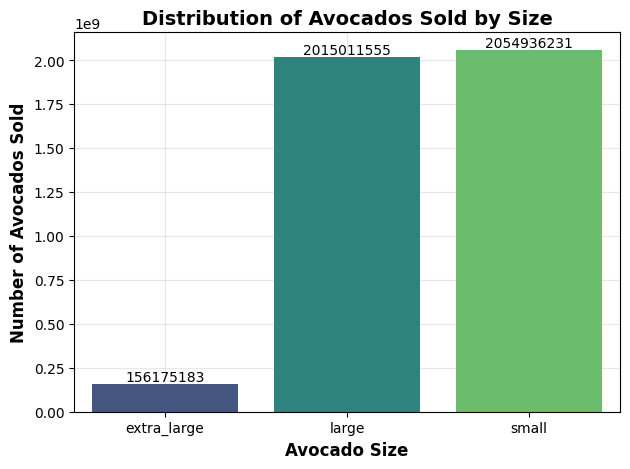

In [94]:
# Create a bar plot of the number of avocados sold by size
fig, ax = plt.subplots()

# Reset index to convert Series to DataFrame for seaborn
nb_sold_df = nb_sold_by_size.reset_index()
sns.barplot(data=nb_sold_df, x="size", y="nb_sold", palette="viridis", hue="size", ax=ax)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10)

ax.set_xlabel("Avocado Size", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Avocados Sold", fontsize=12, fontweight='bold')
ax.set_title("Distribution of Avocados Sold by Size", fontsize=14, fontweight='bold')
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
# Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as nb_sold_by_date.
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

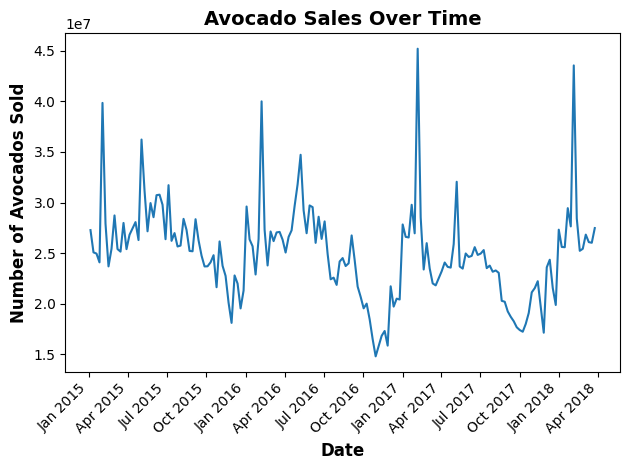

In [96]:
import matplotlib.dates as mdates

# Create a line plot of the number of avocados sold by date
fig, ax = plt.subplots()

# Convert Series to DataFrame for seaborn
nb_sold_df = nb_sold_by_date.reset_index()

# Ensure the 'date' column is of datetime type
nb_sold_df['date'] = pd.to_datetime(nb_sold_df['date'])

sns.lineplot(data=nb_sold_df, x="date", y="nb_sold", legend=False, ax=ax)

ax.set_xlabel("Date", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Avocados Sold", fontsize=12, fontweight='bold')
ax.set_title("Avocado Sales Over Time", fontsize=14, fontweight='bold')

# Adjust x-axis ticks for better readability
# Show a tick every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, ha='right') # Added ha='right' for better label alignment
plt.tight_layout()
plt.show()

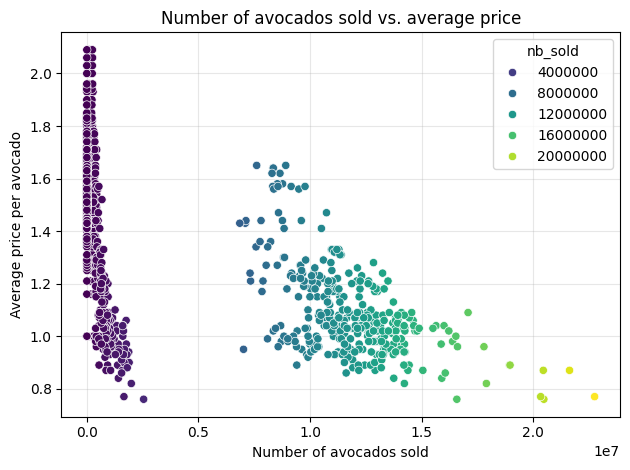

In [97]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".
fig, ax = plt.subplots()

sns.scatterplot(data=avocados, x="nb_sold", y="avg_price", palette="viridis", hue="nb_sold", legend=True)
ax.set(xlabel="Number of avocados sold", ylabel="Average price per avocado", title="Number of avocados sold vs. average price")
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [117]:
# Ensure 'date' is datetime and create 'year' column if it doesn't exist
# This step is crucial as 'year' was not in the original 'avocados' DataFrame.
if 'year' not in avocados.columns:
    avocados['date'] = pd.to_datetime(avocados['date'])
    avocados['year'] = avocados['date'].dt.year

# Subset for avocado types
avocados_conventional = avocados[avocados["type"] == "conventional"].copy()
avocados_organic = avocados[avocados["type"] == "organic"].copy()

# Convert 'year' to category for distinct colors and legend labels
avocados_conventional['year'] = avocados_conventional['year'].astype('category')
avocados_organic['year'] = avocados_organic['year'].astype('category')

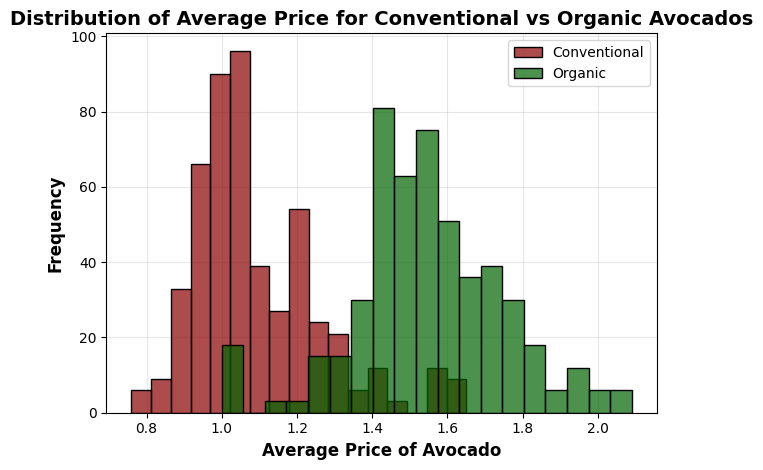

In [ ]:
fig, ax = plt.subplots()


sns.histplot(data=avocados_conventional, x="avg_price", color="#8B0000", ax=ax, label="Conventional", alpha=0.7)  # Dark red
sns.histplot(data=avocados_organic, x="avg_price", color="#006400", ax=ax, label="Organic", alpha=0.7)  # Dark green

ax.set_xlabel("Average Price of Avocado", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold') 
ax.set_title("Distribution of Average Price for Conventional vs Organic Avocados", fontsize=14, fontweight='bold')
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Missing Values

Missing values are a ubiquitous feature of real-world data and must be handled thoughtfully to ensure analytical integrity. Pandas provides a robust suite of tools for **detecting**, **visualising**, **removing**, and **imputing** missing data, enabling both transparent diagnosis and principled remediation.


### 1. Interpreting Missing Values

- **Sources:** Data entry errors, sensor failures, unavailable information, or inconsistent merging.
- **Meaning:** A missing value may represent the absence of a response, an error, or a meaningful non-observation. Always understand the context before choosing a remediation strategy.
- **Impact:** Missing data can bias results, disrupt calculations, or invalidate models if not properly managed.


### 2. Detecting Missing Values: Pandas Syntax

#### a) Identifying missing values

```python
df.isna()
```
Returns a DataFrame of booleans indicating where values are missing (`True` for missing, `False` otherwise).

#### b) Checking for any missing values

```python
df.isna().any()
```
Returns a Series indicating if **any** value in each column is missing.

#### c) Counting missing values per column

```python
df.isna().sum()
```
Returns the count of missing values for each column, aiding in prioritising columns for cleaning.

#### d) Proportion of missing values per column

```python
df.isna().mean()
```
Returns the fraction (between 0 and 1) of missing values in each column.


### 3. Visualising Missing Values

Visualisation is essential for understanding the **pattern** of missingness (random vs. systematic).

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()
```
This heatmap reveals rows and columns with clusters of missing values, often indicating structural or batch-related issues.


### 4. Removing Missing Values

#### a) Removing rows with missing values

```python
df_clean = df.dropna()
```
Removes **any row** containing at least one missing value.

#### b) Removing columns with missing values

```python
df_clean = df.dropna(axis="columns")
```
Removes columns that contain **any** missing values.

#### c) Removing rows where specific columns are missing

```python
df_clean = df.dropna(subset=["col1", "col2"])
```
Removes only those rows where `"col1"` or `"col2"` is missing.


### 5. Imputing/Replacing Missing Values

#### a) Replace missing values with a constant or summary statistic

```python
df_filled = df.fillna(0)  # Replace all missing values with zero
df_filled = df.fillna(df.mean())  # Replace with column mean (numeric only)
```

#### b) Forward or backward fill (useful for time series)

```python
df_filled = df.fillna(method="ffill")  # Forward-fill
df_filled = df.fillna(method="bfill")  # Backward-fill
```


### 6. Best Techniques and Approaches

- **Understand the context:** Is missingness random, systematic, or informative? Avoid mechanical cleaning without understanding data provenance.
- **Minimal removal:** Only drop data when essential; prefer imputation if analysis will be biased or sample size is limited.
- **Impute thoughtfully:** For numeric data, use mean/median; for categorical, use mode or a sentinel value; for time series, use forward/backward fill.
- **Visualise before and after:** Always check that your approach hasn't introduced artifacts or hidden patterns.
- **Document your decisions:** Record what method was used and why - this supports transparency and reproducibility.


In [125]:
avocados_2016 = avocados[avocados["date"] >= "2016"]

In [130]:
# Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
avocados_2016.isna()

,date,type,year,avg_price,size,nb_sold
52,False,False,False,False,False,False
53,False,False,False,False,False,False
54,False,False,False,False,False,False
55,False,False,False,False,False,False
56,False,False,False,False,False,False
...,...,...,...,...,...,...
1009,False,False,False,False,False,False
1010,False,False,False,False,False,False
1011,False,False,False,False,False,False
1012,False,False,False,False,False,False


## Creating DataFrames

The DataFrame is Pandas’ core data structure—tabular, flexible, and designed for robust data analysis. Mastering DataFrame creation is foundational, allowing you to efficiently bring raw data into a workable analytical format. Two principal idioms for creation are **from a list of dictionaries** and **from a dictionary of lists**. Understanding the distinction helps you precisely control how your data is structured.

### 1. Creating a DataFrame from a List of Dictionaries

- **Each dictionary represents a row; keys are column names.**
- The list itself corresponds to all rows in the DataFrame.

```python
import pandas as pd

data = [
    {"name": "Alice", "age": 30, "country": "UK"},
    {"name": "Bob", "age": 25, "country": "USA"},
    {"name": "Carlos", "age": 22, "country": "Brazil"},
]

df = pd.DataFrame(data)
```

- **Missing keys** in any dictionary will produce `NaN` in the resulting DataFrame for those fields.


### 2. Creating a DataFrame from a Dictionary of Lists

- **Each key is a column name; its list is the column's data.**
- All lists must be the same length (number of rows).

```python
data = {
    "name": ["Alice", "Bob", "Carlos"],
    "age": [30, 25, 22],
    "country": ["UK", "USA", "Brazil"]
}

df = pd.DataFrame(data)
```

- **Dictionary of lists = by column**.  
- If lists are unequal in length, Pandas will raise a `ValueError`.


### 3. Summary Table: Idioms and Orientation

| Construction Method         | Syntax Example                  | Data Structure     | Row/Column Orientation       |
|----------------------------|----------------------------------|-------------------|-----------------------------|
| List of Dictionaries       | `pd.DataFrame([{}, {}, ...])`    | Each dict = row   | "by row"                    |
| Dictionary of Lists        | `pd.DataFrame({k: [..], ...})`   | Each list = col   | "by column"                 |

### 4. Other Considerations and Best Practices

- **Explicit column order:** Use the `columns` parameter to set or reorder columns:

    ```python
    df = pd.DataFrame(data, columns=["name", "country", "age"])
    ```

- **Indexing:** The default index is a simple RangeIndex (0, 1, 2, ...), but you may specify a custom index:

    ```python
    df = pd.DataFrame(data, index=["a", "b", "c"])
    ```

- **Missing values:** If data is incomplete, Pandas will fill in missing entries with `NaN`.


### 5. When to Use Each Method

- **List of dictionaries**: When data is naturally “row-wise”—such as after parsing JSON lines, records from a database, or individual survey responses.
- **Dictionary of lists**: When columns are naturally aligned and constructed programmatically (e.g., generated arrays, separate data sources per variable).


In [132]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
display(avocados_2019)

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [133]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
display(avocados_2019)

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


## Reading and Writing CSVs

CSV (**Comma-Separated Values**) files are the lingua franca of tabular data exchange. Designed for DataFrame-like structures, CSVs are human-readable, lightweight, and widely compatible with database, spreadsheet, and statistical software. Mastering their use in Pandas enables seamless data import/export in almost any analytical workflow.


### 1. What is a CSV File?

- **Format:** Plain text, where each row is a record and each column is separated by a comma (or, occasionally, other delimiters).
- **Purpose:** Ideal for storing rectangular/tabular data—precisely the kind of data Pandas excels at.
- **Interoperability:** Supported by virtually all relational databases, Excel, Google Sheets, statistical tools, and many web services.


### 2. Reading a CSV into a DataFrame

Use `pd.read_csv()` to ingest CSV data into a DataFrame for analysis:

```python
import pandas as pd

df = pd.read_csv("data.csv")
```

**Options:**
- For non-standard delimiters (e.g., tabs), use `sep="\t"`.
- To specify column data types, use `dtype={"column1": int, "column2": float}`.
- Handle missing values with `na_values=["NA", ""]`.
- Read only a subset of rows with `nrows=100`.
- For large files, use `chunksize=10000` to process in batches.


### 3. Manipulating the DataFrame

Once loaded, the DataFrame can be freely manipulated:

```python
df["bmi"] = df["weight_kg"] / (df["height_cm"] / 100) ** 2
print(df.head())
```

- You may add, modify, or drop columns, filter rows, compute aggregates, or perform any analysis supported by Pandas.


### 4. Writing a DataFrame to CSV

Export a DataFrame to a CSV file using `.to_csv()`:

```python
df.to_csv("data_with_bmi.csv", index=False)
```
- `index=False` omits the DataFrame’s index from the file (recommended for interoperability).
- Use `sep="\t"` for TSV (tab-separated values).
- Control NA output with `na_rep="NULL"` or other strings.
- For selective output, use `columns=["col1", "col2"]`.

### 5. Best Practices and Considerations

- **Column order and names:** Always verify column order and naming conventions for downstream compatibility.
- **Encoding:** Use `encoding="utf-8"` for maximum compatibility, especially with non-ASCII data.
- **Data integrity:** Confirm data types and missing value handling upon reading—CSV files do not preserve typing metadata.
- **Version control:** CSVs are diff-friendly for source control systems, making them ideal for small/medium data.

